[理论知识](https://zhuanlan.zhihu.com/p/77151308)
[代码实现](https://www.cnblogs.com/liu247/p/10993154.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat


c:\Users\ZSY\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# 使用loadmat函数加载.mat文件
raw_data = loadmat('data1.mat');raw_data2 = loadmat('data2.mat');raw_data3 = loadmat('data3.mat')
# 将前两列特征和最后一列目标值读入data中
data1 = raw_data['X'];data2 = raw_data2['X'];data3 = raw_data3['X']

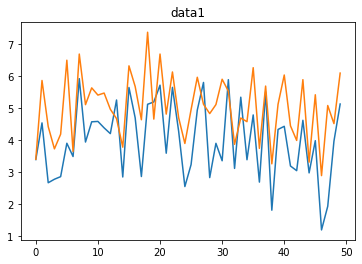

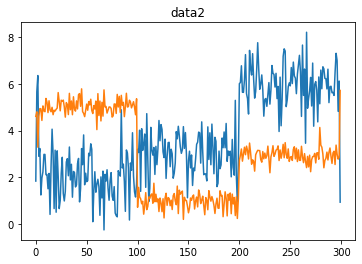

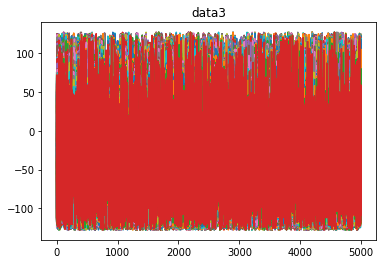

In [10]:
plt.plot(data1)
plt.title('data1')
plt.show()
plt.plot(data2)
plt.title('data2')
plt.show()
# plt.plot(data3)
# plt.title('data3')
# plt.show()

In [11]:
#将数据进行标准化
print(data1[:5,:])
mean_val = np.mean(data1,axis=0)
print(mean_val)
meaned_data = data1 - mean_val
print('Feature mean:',np.mean(meaned_data,axis=0))
print('\n',meaned_data[:5,:])

[[3.38156267 3.38911268]
 [4.52787538 5.8541781 ]
 [2.65568187 4.41199472]
 [2.76523467 3.71541365]
 [2.84656011 4.17550645]]
[3.98926528 5.00280585]
Feature mean: [-1.77635684e-16  1.12798659e-15]

 [[-0.60770261 -1.61369317]
 [ 0.5386101   0.85137225]
 [-1.33358341 -0.59081113]
 [-1.22403061 -1.2873922 ]
 [-1.14270518 -0.8272994 ]]


In [12]:
cov_mat = np.cov(meaned_data,rowvar=False)
print('Shape:',cov_mat.shape)
print(cov_mat)

Shape: (2, 2)
[[1.3760461  0.8830104 ]
 [0.8830104  1.04736348]]


In [13]:
# 计算特征值和特征向量
eig_vals,eig_vects = np.linalg.eig(np.mat(cov_mat))

print('特征值',eig_vals)
print('特征向量',eig_vects)

sorted_index = np.argsort(-eig_vals) # 对特征值从大到小排序
print('排序的索引',sorted_index)

特征值 [2.10987818 0.3135314 ]
特征向量 [[ 0.76908153 -0.63915068]
 [ 0.63915068  0.76908153]]
排序的索引 [0 1]


In [14]:
# 取最大的２个特征索引
topn_index = sorted_index[:1]
print('最大的1个特征索引',topn_index)

topn_vects = eig_vects[:,topn_index] # 最大的n个特征值对应的特征向量
print('最大的1个特征，对应的维特征向量\n',topn_vects) 

最大的1个特征索引 [0]
最大的1个特征，对应的维特征向量
 [[0.76908153]
 [0.63915068]]


In [15]:
# 将数据映射降维
pca_data = meaned_data * topn_vects # 投影到低维空间
print('降低维度后的数据\n',pca_data[:5,:])

recon_data = (pca_data * topn_vects.T)+mean_val # 重构数据
print('还原后的数据\n',recon_data)

降低维度后的数据
 [[-1.49876595]
 [ 0.95839024]
 [-1.40325172]
 [-1.76421694]
 [-1.40760243]]
还原后的数据
 [[2.83659207 4.04486857]
 [4.72634551 5.61536162]
 [2.9100503  4.10591656]
 [2.63243861 3.87520539]
 [2.90670425 4.1031358 ]
 [4.66119642 5.56121901]
 [3.01214593 4.19076386]
 [5.9509394  6.63306909]
 [4.00056954 5.01220034]
 [4.63294183 5.53773783]
 [4.52925986 5.45157219]
 [4.44080087 5.37805771]
 [4.08534903 5.08265693]
 [4.56369617 5.48019073]
 [2.70005855 3.93140142]
 [5.60645689 6.34678444]
 [4.7271954  5.61606793]
 [3.13071099 4.2892982 ]
 [5.81252897 6.51804211]
 [4.51994424 5.44383037]
 [5.83042713 6.53291651]
 [3.64867972 4.7197598 ]
 [5.51466548 6.27050054]
 [3.99740954 5.00957419]
 [2.58026656 3.83184743]
 [3.50690371 4.60193583]
 [5.01346353 5.85397309]
 [5.10802719 5.9325609 ]
 [3.20542432 4.35138924]
 [3.9778121  4.9932876 ]
 [4.04473622 5.04890537]
 [5.36237971 6.14394236]
 [2.90241425 4.09957056]
 [4.62486905 5.53102888]
 [3.41116687 4.52237305]
 [5.07021769 5.90113904]
 [2.58

In [5]:
def fun(data, dim):
    # 将数据进行标准化
    # 求平均值
    mean_val = np.mean(data,axis=0)
    meaned_data = data - mean_val
    # 计算协方差矩阵
    cov_mat = np.cov(meaned_data,rowvar=False)
    # 计算特征值和特征向量
    eig_vals,eig_vects = np.linalg.eig(np.mat(cov_mat))
    # 对特征值从大到小排序
    sorted_index = np.argsort(-eig_vals) 
    # 取最大的dim个特征索引
    topn_index = sorted_index[:dim]
    # 最大的n个特征值对应的特征向量
    topn_vects = eig_vects[:,topn_index] 
    # 将数据映射降维
    # 投影到低维空间
    pca_data = meaned_data * topn_vects
    # 重构数据
    recon_data = (pca_data * topn_vects.T)+mean_val
    # print('还原后的数据\n',recon_data)
    return pca_data

In [10]:
pca_data1 = fun(data1,1)
pca_data2 = fun(data2,1)

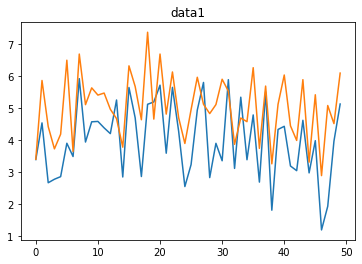

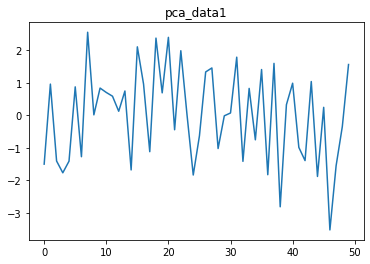

In [9]:
plt.plot(data1)
plt.title('data1')
plt.show()
plt.plot(pca_data1)
plt.title('pca_data1')
plt.show()


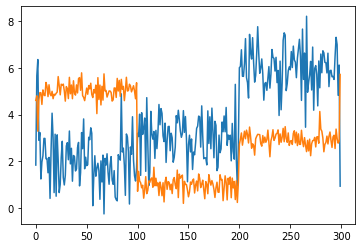

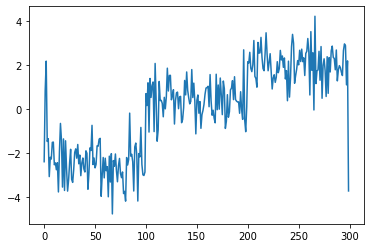

In [11]:
plt.plot(data2)
plt.show()
plt.plot(pca_data2)
plt.show()

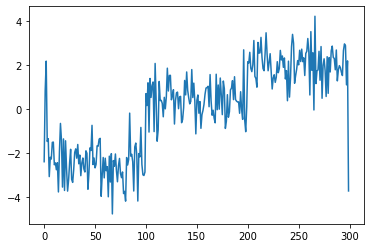

In [45]:
plt.plot(pca_data2)

In [57]:
# 使用sklean实现
from sklearn.decomposition import PCA

In [58]:
# 压缩为２维数据
# 初始化PCA模型
pca = PCA(n_components=1)
print('模型：',pca) 
# 训练模型
pca.fit(data1)

模型： PCA(n_components=1)


PCA(n_components=1)

In [60]:
# 获得降维后的数据
feature1  = pca.transform(data1)
print('特征值的比例:',pca.explained_variance_ratio_)
print('降维后的占比:',sum(pca.explained_variance_ratio_))
print('降维后的数据：\n',feature1[:5,:])

特征值的比例: [0.87062385]
降维后的占比: 0.8706238489732336
降维后的数据：
 [[ 1.49876595]
 [-0.95839024]
 [ 1.40325172]
 [ 1.76421694]
 [ 1.40760243]]


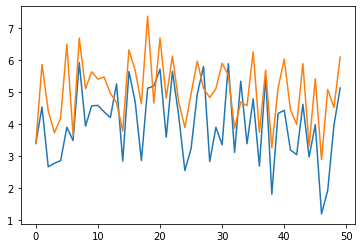

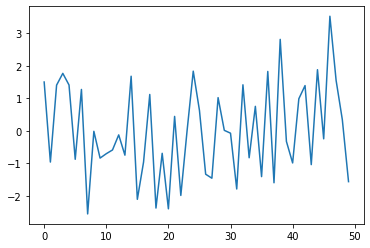

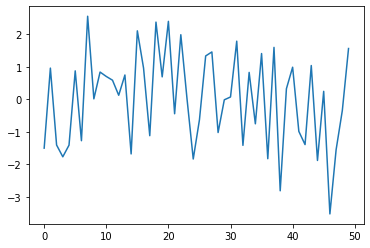

In [64]:
plt.plot(data1)
plt.show()
plt.plot(feature1)
plt.show()
plt.plot(pca_data)
plt.show()